In [39]:
from music import N

import matplotlib.pyplot as plt

import numpy as np
import sounddevice as sd


In [ ]:
class N:

  def __init__(self, tone: int, duration: float = 1):
    self.tone = tone
    self.duration = duration

    self.frequency = 261.63 * 2 ** (self.tone / 12)
    t = np.linspace(0, self.duration, int(22050 * self.duration))
    self.waveform = np.sin(2 * np.pi * self.frequency * t)
    self.envelope = np.exp(-4 * t)
    self.sound = (self.waveform * self.envelope * 0.3).astype(np.float32)

  def play(self):
    sd.play(self.sound, samplerate=22050)
    sd.wait()

n = N(0,1)

n.play()

In [ ]:
notes = [N(0,1),N(1,1),N(2,1),N(3,1),N(4,1),N(0,1)]

stream = np.concatenate([note.sound for note in notes])
sd.play(stream, samplerate=22050)
sd.wait()



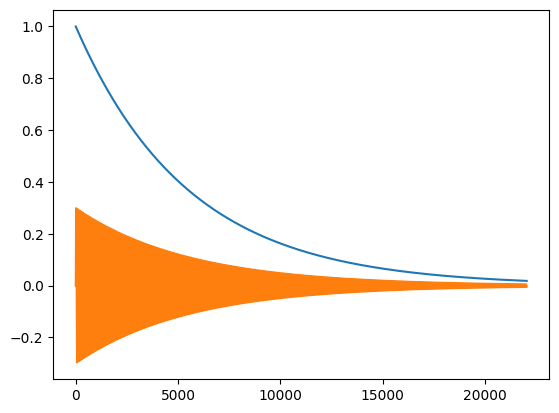

In [67]:
plt.plot(n.envelope)
plt.plot(n.sound)

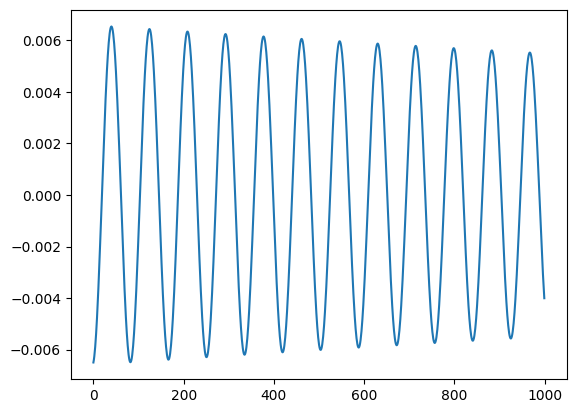

In [69]:
plt.plot(n.sound[-1000:])